<a href="https://colab.research.google.com/github/varun-beep/NLP_LAB/blob/main/Indian_Language_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set 


✅ Model Accuracy: 0.0

✅ Classification Report:
               precision    recall  f1-score   support

     English       0.00      0.00      0.00       0.0
       Tamil       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



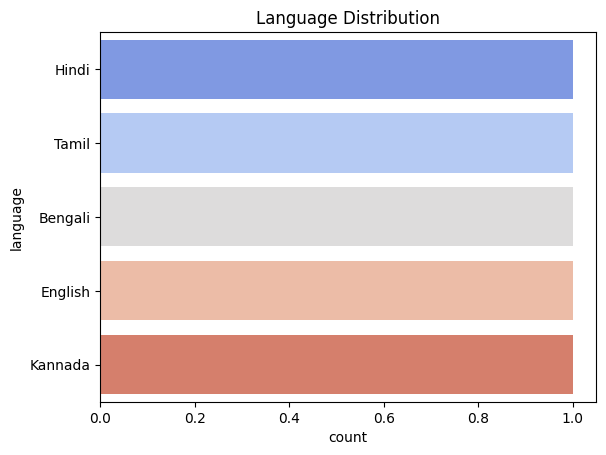

In [11]:
# ✅ Import Required Libraries
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# ✅ Download NLTK Resources
nltk.download('punkt')
nltk.download('stopwords')

# ✅ Manually Define a Small Dataset
data = {
    "text": [
        "यह एक हिंदी वाक्य है।",
        "தமிழ் ஒரு அழகான மொழி.",
        "বাংলা ভাষা খুব মিষ্টি।",
        "This is an English sentence.",
        "ಕನ್ನಡ ತುಂಬಾ ಸೊಗಸಾದ ಭಾಷೆ."
    ],
    "language": ["Hindi", "Tamil", "Bengali", "English", "Kannada"]
}

# ✅ Convert to DataFrame
df = pd.DataFrame(data)

# ✅ Preprocess Text (Lowercase, Remove Punctuation, Stopwords)
stop_words = set(stopwords.words('english'))  # Using English stopwords

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

df["cleaned_text"] = df["text"].apply(preprocess_text)

# ✅ TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["cleaned_text"])
y = df["language"]

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# ✅ Make Predictions
y_pred = model.predict(X_test)

# ✅ Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Model Accuracy:", accuracy)
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Visualizing Data Distribution
sns.countplot(y=df['language'], order=df['language'].value_counts().index, palette="coolwarm")
plt.title("Language Distribution")
plt.show()



✅ Model Accuracy: 1.0

✅ Classification Report:
               precision    recall  f1-score   support

     Bengali       1.00      1.00      1.00         1
     English       1.00      1.00      1.00         1
       Hindi       1.00      1.00      1.00         1
     Kannada       1.00      1.00      1.00         1
       Tamil       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-12-b6bdd866b2ca>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['language'], order=df['language'].value_counts().index, palette="coolwarm")


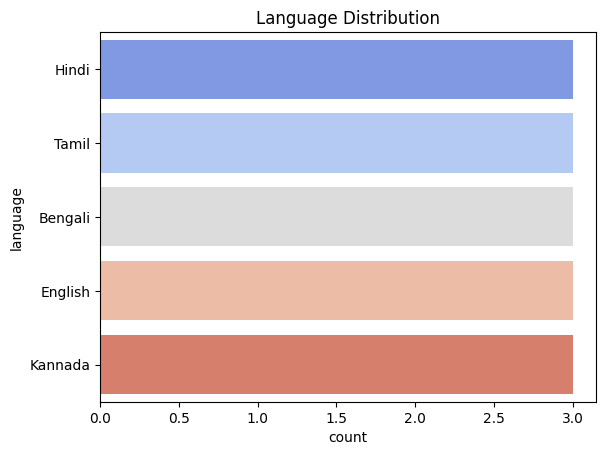

In [12]:
# ✅ Import Required Libraries
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  # Naïve Bayes works better for small text data
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize

# ✅ Download NLTK Resources
nltk.download('punkt')

# ✅ Define a Larger Dataset
data = {
    "text": [
        "यह एक हिंदी वाक्य है।", "मुझे किताबें पढ़ना पसंद है।", "हिंदी मेरी मातृभाषा है।",
        "தமிழ் ஒரு அழகான மொழி.", "நான் தமிழில் பேசுகிறேன்.", "தமிழ் எழுத்துக்கள் மிகவும் தனித்துவமானவை.",
        "বাংলা ভাষা খুব মিষ্টি।", "আমি বাংলা ভাষায় কথা বলি।", "বাংলা আমার প্রিয় ভাষা।",
        "This is an English sentence.", "I love reading books.", "English is a widely spoken language.",
        "ಕನ್ನಡ ತುಂಬಾ ಸೊಗಸಾದ ಭಾಷೆ.", "ನಾನು ಕನ್ನಡದಲ್ಲಿ ಮಾತನಾಡುತ್ತೇನೆ.", "ಕನ್ನಡ ನನ್ನ ತಾಯಿಯ ಭಾಷೆ."
    ],
    "language": ["Hindi", "Hindi", "Hindi", "Tamil", "Tamil", "Tamil",
                 "Bengali", "Bengali", "Bengali", "English", "English", "English",
                 "Kannada", "Kannada", "Kannada"]
}

# ✅ Convert to DataFrame
df = pd.DataFrame(data)

# ✅ Preprocess Text (Lowercase, Remove Punctuation, Tokenization)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    return " ".join(tokens)

df["cleaned_text"] = df["text"].apply(preprocess_text)

# ✅ TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["cleaned_text"])
y = df["language"]

# ✅ Train-Test Split (Stratified to Ensure Balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ✅ Train Naïve Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# ✅ Make Predictions
y_pred = model.predict(X_test)

# ✅ Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Model Accuracy:", accuracy)
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# ✅ Visualizing Data Distribution
sns.countplot(y=df['language'], order=df['language'].value_counts().index, palette="coolwarm")
plt.title("Language Distribution")
plt.show()